# <span style="color:blue"> Esercitazione 09 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1 
(code CommessoViaggiatore.cpp)


### Scopo dell'esercizio

Lo scopo dell'esercizio è quello di implementare un algoritmo genetico per risolvere il problema del **commesso viaggiatore** (**TSP**). Il numero di città scelto è pari a $N_{cities}=32$, disposte in due configurazioni:
- in modo casuale su una circonferenza;
- in modo casuale in un quadrato.

### Descrizione del codice

**Struttura dati:** La configurazione scelta per implementare il TSP è quella unidimensionale, in cui un array rappresenta la sequenza di città visitate dal commesso, a partire dalla prima (che si sceglie di mantenere fissata).
Per realizzare l'algoritmo genetico, si è utilizzata la libreria *vector*. La popolazione è un *vector* (o una *list* nel linguaggio Python) di cromosomi. Ogni cromosoma è un *array* di lunghezza $N_{cities}$, di cui ogni componente rappresenta un gene. La popolazione consta di $N_{cromo}=1000$ individui. 

Per la spiegazione del codice si analizzeranno in sequenza le principali functions, nell'ordine temporale in cui queste vengono chiamate dal main. <p>

**Input():** La funzione Input inizializza il sistema. Essa ha due scopi: costruire la "mappa" del commesso, cioè posizionare a caso le 32 città nel dominio del problema, e successivamente generare la popolazione iniziale di cromosomi. <p>
Riguardo al primo dei due compiti, per la prima configurazione (su circonferenza), si è considerata una *circonferenza unitaria* e la collocazione delle città è stata svolta generando un angolo casuale $\theta \in [0,2\pi]$ e calcolando le coordinate $x=\cos\theta$, $y=\sin\theta$. Per la seconda, si è considerato un *quadrato di lato 1*, generando coordinate x e y casuali. <p>
Per generare la popolazione si è, invece, partiti da un cromosoma ordinato $[0,1,2,..., N_{cities}-1]$ e gli si è applicato più volte ciascuno degli operatori di *Mutazione*, discussi nel seguito. Il numero di applicazioni di tali operatori è stato scelto casualmente. Così facendo, si è ottenuto un nuovo individuo diverso dal precedente da aggiungere alla popolazione (*.push_back()*). A questo individuo è stata applicata la stessa procedura, in modo da generarne un altro, e così via. <p>
A questo punto è stata applicata la funzione *Ordering*, che calcola il *fitness* della popolazione iniziale, ovvero il valore della funzione costo su tutti gli individui, e li ordina in modo crescente dal costo più basso a quello più alto. La funzione costo scelta è stata la $\lVert \cdot \rVert_2$, mentre come algoritmo di ordinamento è stato usato il *selection sort*. Tale funzione, inoltre, ha il compito di scrivere su file il valore della cost function per il miglior percorso e il valor medio della stessa mediato sulla migliore metà della popolazione. <p> 
    
**Move(istep):** <p>
La funzione ha il compito di regolare la riproduzione della popolazione, operazione che avviene in tre momenti.

- A partire dalla sequenza di invidui ordinata per fitness, l'operatore **Selection** sceglie due genitori da riprodurre. Si scelgono come genitori i due cromosomi a fitness più alto mediante l'utilizzo di una roulette truccata: a partire dalla sequenza ordinata di cromosomi si scelgono due individui $j= N_{cromo} \cdot int(r^p)$ (r numero casuale in $[0,1]$). Siccome l'ordinamento è stato fatto in modo crescente, ne consegue che l'esponente $p$ deve essere *positivo*, in modo da concentrare gli esiti della roulette intorno ai piccoli valori di j (che corrispondono agli individui più adattivi). In questo caso si è posto $p=5$. In modo simile si scelgono anche gli individui peggiori, che essendo a fitness più basso corrispondono agli ultimi elementi della sequenza ordinata di cromosomi. Pertanto il ragionamento è ribaltato rispetto a prima e si sono selezionati due cromosomi $k= N_{cromo} \cdot int(r^q)$ con $q=1/p$.<p>

- Una volta individuati il Genitore 1 e 2, gli operatori di **Mutazione** (con una probabilità $p_m=0.4$ ) operano su di essi proponendo delle mutazioni della sequenza di geni. Gli operatori implementati sono quelli suggeriti nell'esercizio: *PairPerm* (che scambia due geni a caso nel cromosoma), *Shift* (che fa una permutazione ciclica di un blocco di geni), *Permutation* (che permuta due blocchi di geni) e *Inversion* (che inverte la sequenza genica di un blocco di geni). In tutte queste operazioni il primo gene, ovvero la città di partenza, rimane fissato. <p>

- A questo punto avviene il **Crossover** (con una probabilità $p_c=0.8$ ). I due genitori vengono incrociati, scambiandosi due porzioni finite di geni comprese tra due punti *cut_1* e *cut_2* e generando due figli. L'operazione è molto delicata perchè nel farlo i figli "partoriti" potrebbero non rispettare i vincoli del problema, potrebbero cioè contenere due geni identici (città attraversata due volte) e un gene mancante (città non attraversata). Per ovviare a ciò si è programmata una routine di controllo *Check* e il crossover viene ripetuto più volte finchè non si ottengono dei figli accettabili.
D'altro canto, nel caso in cui il crossover non avvenga (con probabilità $1-p_c$) i figli vengono presi uguali ai genitori. <p>In ciascuno dei due casi, al termine di queste operazioni, si aggiorna la popolazione aggiungendo i due nuovi individui prodotti. Nel caso in questione, per velocizzare la convergenza dell'algoritmo si è deciso contestualmente di *cancellare i due cromosomi meno prestanti* (individuati in precedenza da *Selection*), in modo da mantenere la size della popolazione costante. La selezione di una coppia di genitori e la successiva procreazione viene ripetuta per un numero di step $N_{step}=N_{cromo}/5$. In altre parole, il miglior $20 \%$ della popolazione viene fatto riprodurre a discapito del peggior $20 \%$, che viene soppresso. <p>
La sequenza di tutte le operazioni qui descritte rappresenta una singola *generazione* della popolazione in esame. Al termine di ogni generazione viene richiamata la funzione *Ordering* per riordinare nuovamente i cromosomi ed aggiornare il valore della cost function. La popolazione è stata fatta evolvere per un totale di $N_{gen}=500$ generazioni. 

**BestPath():** Arrivati all'ultima generazione la funzione *BestPath* scrive su file il cromosoma con il fitness più alto, ovvero il percorso ottimale di collegamento tra le 32 città.

### Analisi dati

Si riportano i grafici del miglior percorso e l'andamento della cost function $L$ sia per il miglior percorso, sia il vuo valor medio sulla migliore metà della popolazione.

### <span style="color:red"> Caso 1 : città su una circonferenza

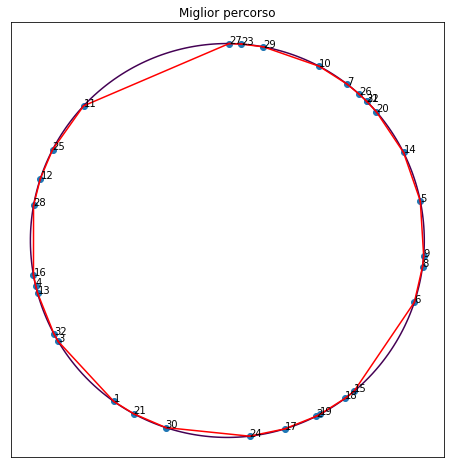

In [1]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

Citta=genfromtxt('C_Citta.dat')
Percorso=genfromtxt('C_BestPath.dat')

N=arange(1,33,1)
plt.figure(figsize=(8.,8.))
plt.title('Miglior percorso')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.1,1.1)
plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Percorso[i])
    stop=int(Percorso[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='r')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='r' )

#---PLOT DEL CERCHIO---#
x = linspace(-1.0, 1.0, 100)
y = linspace(-1.0, 1.0, 100)
X, Y = meshgrid(x,y)
F = X**2 + Y**2 - 1.0
plt.contour(X,Y,F,[0])
plt.show()

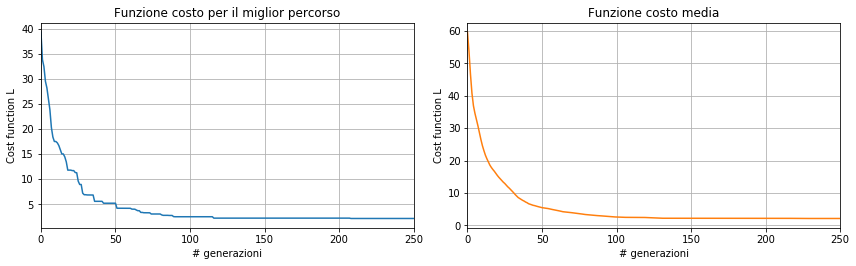

In [5]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

BestL= genfromtxt('C_Best_L.dat')
AveL= genfromtxt('C_Ave_L.dat')

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.set_title('Funzione costo per il miglior percorso')
ax.plot(BestL[:,0], BestL[:,1], color='C0')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.set_xlim(0,250)
ax.grid(True)

ax = fig.add_subplot(122)
ax.set_title('Funzione costo media')
ax.plot(AveL[:,0], AveL[:,1], color='C1')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.set_xlim(0,250)
ax.grid(True)

plt.tight_layout()
plt.show()

Quale sia il cammino più breve in questo caso è perfettamente intuibile. Si tratta del percorso che, a partire dalla città 1, visita tutte le altre secondo l'ordine in cui sono disposte sulla circonferenza (in senso orario o antiorario). I grafici mostrano come l'algoritmo scopra il cammino più breve. Il percorso minimo si ottiene dopo poco più di 200 step, ma si osservi che per ottenere una soluzione comunque molto buona (anche se non quella a distanza minima) ne sono necessari meno di 100. Il valor medio della distanza ricalca in modo molto simile quello del miglior individuo, questo perchè si è scelto di modificare una grossa fetta di popolazione (il $20 \%$) a ogni popolazione, rimuovendo in modo brutale gli individui meno prestanti.<p> Il valore della distanza minima percorsa dal commesso risulta pari a $2.13133$.
    
### <span style="color:red"> Caso 2 : città in un quadrato

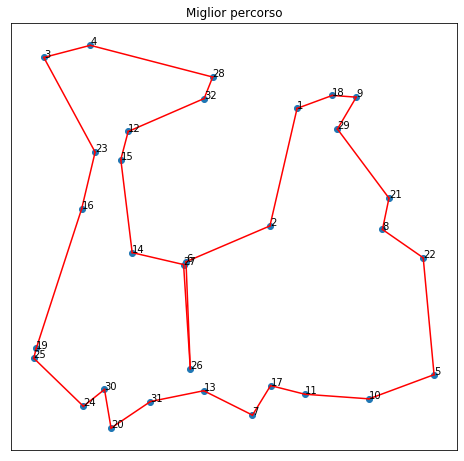

In [6]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

Citta=genfromtxt('Q_Citta.dat')
Percorso=genfromtxt('Q_BestPath.dat')

N=arange(1,33,1)
plt.figure(figsize=(8.,8.))
plt.title('Miglior percorso')
plt.xticks([], [])
plt.yticks([], [])
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(Citta[:,1], Citta[:,2])
for i, txt in enumerate(N):
    plt.annotate(txt, (Citta[i,1], Citta[i,2]) )

for i in range(31):
    start=int(Percorso[i])
    stop=int(Percorso[i+1])
    xstart=Citta[start,1]
    xstop=Citta[stop,1]
    ystart=Citta[start,2]
    ystop=Citta[stop,2]
    plt.plot([xstart, xstop], [ystart,ystop], color='r')
plt.plot([xstop, Citta[0,1]], [ystop, Citta[0,2]], color='r' )
plt.show()

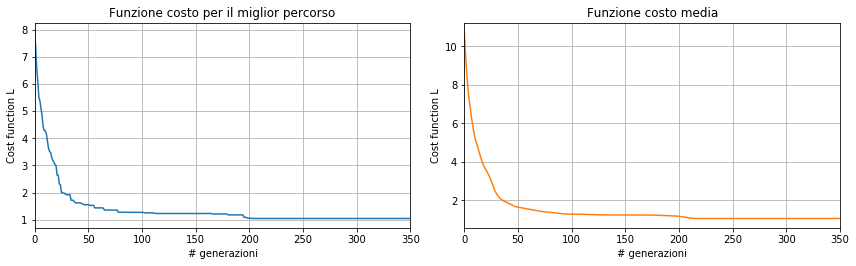

In [9]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

BestL= genfromtxt('Q_Best_L.dat')
AveL= genfromtxt('Q_Ave_L.dat')

fig = plt.figure(figsize=(12, 3.8))

ax = fig.add_subplot(121)
ax.set_title('Funzione costo per il miglior percorso')
ax.plot(BestL[:,0], BestL[:,1], color='C0')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.set_xlim(0,350)
ax.grid(True)

ax = fig.add_subplot(122)
ax.set_title('Funzione costo media')
ax.plot(AveL[:,0], AveL[:,1], color='C1')
ax.set_xlabel('# generazioni')
ax.set_ylabel('Cost function L')
ax.set_xlim(0,350)
ax.grid(True)

plt.tight_layout()
plt.show()

La convergenza è confrontabile con il caso precedente. Il miglior percorso si ottiene sempre dopo 200 step e il valore della distanza minima risulta pari a $1.04648$. <p>
In questo caso forse il sistema non ha raggiunto il minimo globale. Si osservi infatti che un percorso che anzichè collegare la città 26 con la 6 e 27, colleghi la suddetta città con la 31 e 13 risulterebbe più corto. In ogni modo è evidente che il cammino generato dall'algoritmo sia ugualmente molto efficiente. Tutto ciò è una riprova del fatto che le tecniche di ottimizzazione non sempre sono volte alla ricerca del minimo globale della cost function, ma si "accontentano" di trovare il miglior risultato possibile. 